<a href="https://colab.research.google.com/github/MarkLee7925/Heart-Classification-UCI/blob/main/heart_DataVis_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification - Data Visualization - DNN

## Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [2]:
# Load dataframe (df)
df = pd.read_csv('heart.csv')
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(303, 13) (303,)


In [3]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [7]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Visualize data

#### Age Distribution

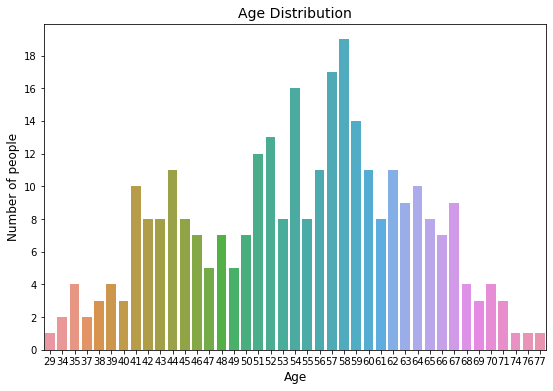

In [8]:
plt.figure(figsize=(9, 6))
plt.yticks(np.arange(0, 20, 2))
age_dist = df['age']
sns.countplot(x=age_dist)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.show()

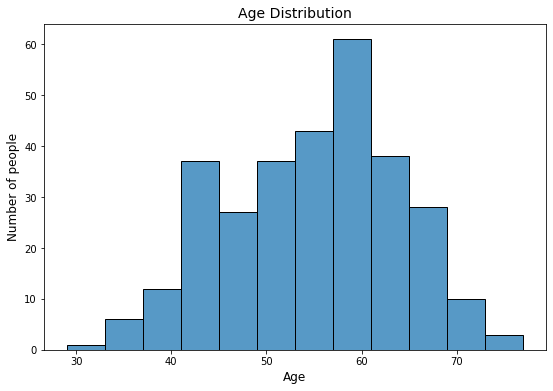

In [9]:
plt.figure(figsize=(9, 6))
age_dist = df['age']
sns.histplot(x=age_dist)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.show()

#### Gender Distribution

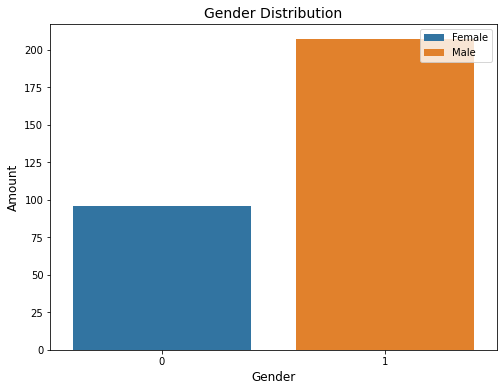

In [10]:
# Gender
plt.figure(figsize=(8, 6))
labels = ['Female', 'Male']
gender_dist = df['sex']
gender_plot = sns.countplot(x=df['sex'], hue=df['sex'], dodge=False)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Gender Distribution', fontsize=14)
plt.legend(labels=labels, loc='upper right')
plt.show()

#### Gender Distribution and Classication Results

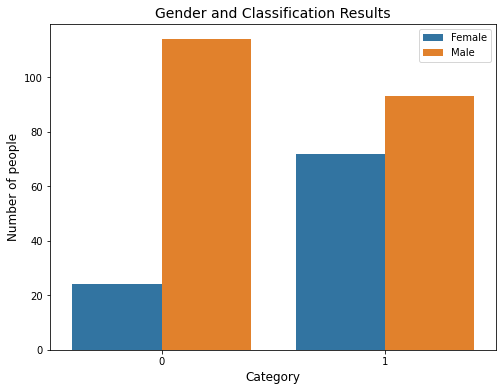

In [11]:
labels = ['Female', 'Male']
plt.figure(figsize=(8, 6))
target = df['target']
sns.countplot(x=target, hue=df['sex'])
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Gender and Classification Results', fontsize=14)
plt.legend(labels=labels)
plt.show()

###### **Category:**
0 = No Heart Disease, 1 = Heart Disease

#### Chest Pain Type and Cholesterol Level

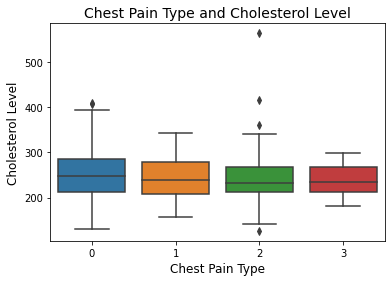

In [13]:
x = df['cp']
y = df['chol']
labels = ['0 - Nontypical', '1 - Nonanginal', '2 - Asymptomatic', '3 - Typical']
box_plot = sns.boxplot(x=x, y=y, data=df)
box_plot.set_xlabel('Chest Pain Type', fontsize=12)
box_plot.set_ylabel('Cholesterol Level', fontsize=12)
box_plot.set_title('Chest Pain Type and Cholesterol Level', fontsize=14)
plt.show()

###### **Types of Chest Pain:**
0 = Nontypical, 1 = Nonanginal, 2 = Asymptomatic, 3 = Typical

#### Chest Pain and Heart Rate

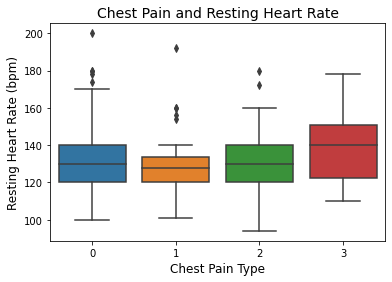

In [14]:
x = df['cp']
y = df['trestbps']
labels = ['0 - Nontypical', '1 - Nonanginal', '2 - Asymptomatic', '3 - Typical']
sns.boxplot(x=x, y=y, data=df)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Resting Heart Rate (bpm)', fontsize=12)
plt.title('Chest Pain and Resting Heart Rate', fontsize=14)
plt.show()

###### **Types of Chest Pain:**
0 = Nontypical, 1 = Nonanginal, 2 = Asymptomatic, 3 = Typical

#### Age vs. Cholesterol Level

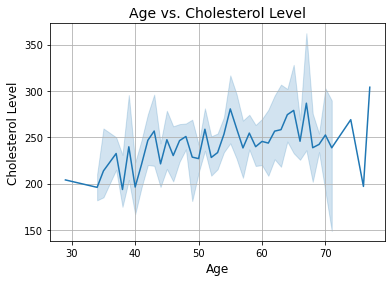

In [15]:
x = df['age']
y = df['chol']
line_plot = sns.lineplot(x=x, y=y, data=df)
line_plot.set_xlabel('Age', fontsize=12)
line_plot.set_ylabel('Cholesterol Level', fontsize=12)
line_plot.set_title('Age vs. Cholesterol Level', fontsize=14)
plt.grid()
plt.show()

#### Age vs. Blood Sugar

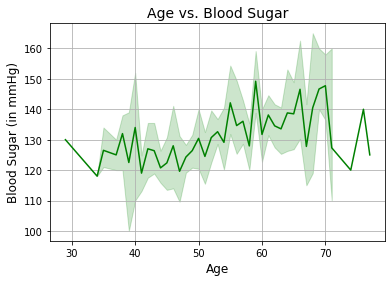

In [16]:
x = df['age']
y = df['trestbps']
line_plot = sns.lineplot(x=x, y=y, data=df, color='green')
line_plot.set_xlabel('Age', fontsize=12)
line_plot.set_ylabel('Blood Sugar (in mmHg)', fontsize=12)
line_plot.set_title('Age vs. Blood Sugar', fontsize=14)
plt.grid()
plt.show()

## Define DNN model

Batch size = 32, Epochs = 150, k-Folds = 3


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Epoch 1/150
8/8 [==============================] - 1s 45ms/step - loss: 0.8561 - accuracy: 0.4739 - val_loss: 0.7655 - val_accuracy: 0.4098
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7960 - accuracy: 0.4475 - val_loss: 0.7268 - val_accuracy: 0.4262
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7462 - accuracy: 0.5045 - val_loss: 0.6933 - val_accuracy: 0.5082
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7124 - accuracy: 0.4958 - val_loss: 0.6650 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6926 - accuracy: 0.6070 - val_loss: 0.6386 - val_accuracy: 0.6557
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7119 - accuracy: 0.5655 - val_loss: 0.6157 - val_accuracy: 0.6885
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6493 - accuracy: 0.6028 - val_loss: 0.5953 - val_accuracy: 0.7213
Epoch 8/150
8/8 [===

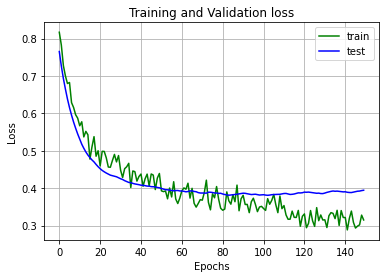

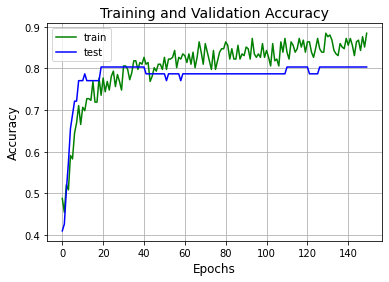

accuracy: 80.328%
Epoch 1/150
8/8 [==============================] - 1s 39ms/step - loss: 0.7292 - accuracy: 0.6242 - val_loss: 0.5221 - val_accuracy: 0.6721
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6377 - accuracy: 0.6830 - val_loss: 0.5116 - val_accuracy: 0.6557
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6354 - accuracy: 0.6295 - val_loss: 0.5025 - val_accuracy: 0.7213
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6567 - accuracy: 0.6553 - val_loss: 0.4961 - val_accuracy: 0.7541
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.5908 - accuracy: 0.6438 - val_loss: 0.4916 - val_accuracy: 0.7705
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 0.5840 - accuracy: 0.6631 - val_loss: 0.4869 - val_accuracy: 0.7869
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6221 - accuracy: 0.6601 - val_loss: 0.4835 - val_accuracy: 0.8033
Ep

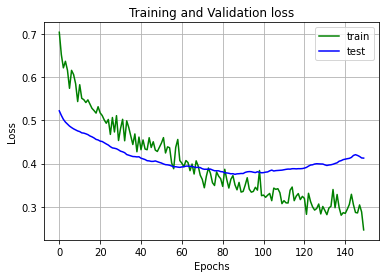

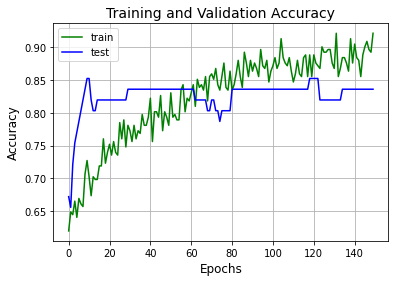

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 38ms/step - loss: 0.7322 - accuracy: 0.4368 - val_loss: 0.7121 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7392 - accuracy: 0.5023 - val_loss: 0.6950 - val_accuracy: 0.4754
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7290 - accuracy: 0.4824 - val_loss: 0.6778 - val_accuracy: 0.5082
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7003 - accuracy: 0.5502 - val_loss: 0.6620 - val_accuracy: 0.5574
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7080 - accuracy: 0.5240 - val_loss: 0.6472 - val_accuracy: 0.6066
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6533 - accuracy: 0.5960 - val_loss: 0.6347 - val_accuracy: 0.6230
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6516 - accuracy: 0.6204 - val_loss: 0.6237 - val_accuracy: 0.6557
Ep

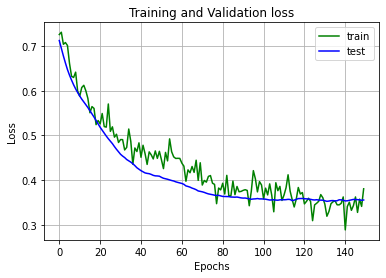

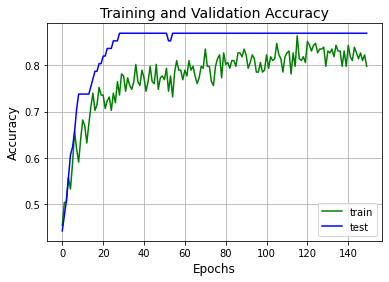

accuracy: 86.885%
Mean Accuracy: 83.607%
Standard Deviation: 2.677%
Losses:
[39.46565091609955, 41.28174185752869, 35.59193015098572]
Scores:
[80.32786846160889, 83.60655903816223, 86.8852436542511]


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score

cv_scores = []  # Scores for each k-Fold
losses = []  # Losses for each k-Fold
def create_model(batch_size, epochs, folds, neurons, dropout_rate):  
  """ Define DL model with specified parameters """
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  print('Batch size = %d, Epochs = %d, k-Folds = %d' % (batch_size, epochs, folds))
  for train, test in kfold.split(X, y):
   
    # Define Deep Learning model
    model = Sequential()
    # Input layer and Hidden Layer 1
    model.add(Dense(units=neurons[0], input_dim=13, activation='relu'))
    # model.add(Dropout(rate=dropout_rate))
    # Hidden Layer 2
    model.add(Dense(units=neurons[1],activation='relu'))
    # Dropout layer
    model.add(Dropout(rate=dropout_rate))
    # Output layer
    model.add(Dense(units=1,activation='sigmoid'))
    
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    # Train model
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

    # Plot loss during training
    plt.plot(history.history['loss'], 'g', label='train')
    plt.plot(history.history['val_loss'], 'b', label='test')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot accuracy during training
    plt.plot(history.history['accuracy'], 'g', label='train')
    plt.plot(history.history['val_accuracy'], 'b', label='test')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Training and Validation Accuracy', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

    # Print scores
    scores = model.evaluate(X_test, y_test, verbose=0)
    print('%s: %.3f%%' % (model.metrics_names[1], scores[1]*100))
    losses.append(scores[0] * 100)  # Loss percentage
    cv_scores.append(scores[1] * 100)  # Score percentage
  return model

# With one dropout layer (optimal results from Random Search)
# {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 6), 
# 'dropout_rate': 0.4}
model = create_model(32, 150, 3, (14, 6), 0.4)

# With two dropout layers (results in too much underfitting)
# {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 8), 
# 'dropout_rate': 0.45}
# model = create_model(32, 150, 3, (14, 8), 0.45)

# Print results
print('Mean Accuracy: %.3f%%' % np.mean(cv_scores))
print('Standard Deviation: %.3f%%' % np.std(cv_scores))
print('Losses:')
print(losses)
print('Scores:')
print(cv_scores)

#### -- Sample Results --

##### Using one dropout layer (optimal results from Random Search):
**Parameters:** {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 6), 'dropout_rate': 0.4}

<table border = "1">
  <thead>
    <th colspan = "5">With one dropout layer</th>
  </thead>
  <tbody>
    <tr>
      <th>Trial</th>
      <th>Mean (%)</th>
      <th>Std. (+/- %)</th>
      <th>Losses (%)</th>
      <th>Scores (%)</th>
    </tr>
    <tr>
      <td><b>1</b></td>
      <td>85.792</td>
      <td>1.546</td>
      <td>[40.784, 36.420, 37.566]</td>
      <td>[83.607, 86.885, 86.885]</td>
    </tr>
    <tr>
      <td><b>2</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[34.234, 38.973, 37.645]</td>
      <td>[88.525, 86.885, 83.607]</td>
    </tr>
    <tr>
      <td><b>3</b></td>
      <td>84.153</td>
      <td>2.045</td>
      <td>[39.444, 36.632, 39.889]</td>
      <td>[81.967, 86.885, 83.607]</td>
    </tr>
    <tr>
      <td><b>4</b></td>
      <td>88.525</td>
      <td>1.339</td>
      <td>[38.665, 30.301, 35.466]</td>
      <td>[86.885, 90.164, 88.525]</td>
    </tr>
    <tr>
      <td><b>5</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[34.047, 35.591, 39.353]</td>
      <td>[88.525, 83.607, 86.885]</td>
    </tr>
    <tr>
      <th>Average:</th>
      <td><b>86.230<b></td>
      <td><b>1.804</b></td>
    </tr>
  </tbody>
</table>

##### With two dropout layers (results in too much underfitting)
**Parameters:** {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 8), 'dropout_rate': 0.45}

<table border = "1">
  <thead>
    <th colspan = "5">With two dropout layers</th>
  </thead>
  <tbody>
    <tr>
      <th>Trial</th>
      <th>Mean (%)</th>
      <th>Std. (+/- %)</th>
      <th>Losses (%)</th>
      <th>Scores (%)</th>
    </tr>
    <tr>
      <td><b>1</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[36.204, 33.903, 37.372]</td>
      <td>[86.885, 83.607, 88.525]</td>
    </tr>
    <tr>
      <td><b>2</b></td>
      <td>84.699</td>
      <td>2.045</td>
      <td>[37.547, 36.046, 32.915]</td>
      <td>[81.967, 85.246, 86.885]</td>
    </tr>
    <tr>
      <td><b>3</b></td>
      <td>83.607</td>
      <td>1.339</td>
      <td>[40.159, 36.067, 40.181]</td>
      <td>[83.607, 85.246, 81.967]</td>
    </tr>
    <tr>
      <td><b>4</b></td>
      <td>84.153</td>
      <td>2.045</td>
      <td>[36.800, 38.977, 37.290]</td>
      <td>[83.607, 86.885, 81.967]</td>
    </tr>
    <tr>
      <td><b>5</b></td>
      <td>85.246</td>
      <td>2.677</td>
      <td>[35.594, 41.179, 37.873]</td>
      <td>[85.246, 81.967, 88.525]</td>
    </tr>
    <tr>
      <th>Average:</th>
      <td><b>85.409</b></td>
      <td><b>2.030</b></td>
    </tr>
  </tbody>
</table>

##### NOTE: These results vary between trials.

## Evaluate model

In [18]:
# Predict test set results
y_pred = model.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))

[[2.56e-02 0.00e+00]
 [7.68e-01 1.00e+00]
 [7.58e-01 0.00e+00]
 [1.63e-02 0.00e+00]
 [2.24e-01 1.00e+00]
 [3.32e-01 0.00e+00]
 [4.59e-02 0.00e+00]
 [1.30e-01 0.00e+00]
 [5.14e-04 0.00e+00]
 [5.75e-03 0.00e+00]
 [9.80e-01 1.00e+00]
 [9.67e-01 1.00e+00]
 [3.26e-02 0.00e+00]
 [9.00e-01 1.00e+00]
 [9.90e-01 1.00e+00]
 [6.36e-01 1.00e+00]
 [1.38e-01 1.00e+00]
 [7.81e-01 1.00e+00]
 [2.00e-02 0.00e+00]
 [8.22e-01 1.00e+00]
 [9.01e-01 1.00e+00]
 [2.45e-01 0.00e+00]
 [1.94e-01 0.00e+00]
 [1.91e-01 0.00e+00]
 [8.42e-01 1.00e+00]
 [8.78e-01 0.00e+00]
 [2.29e-01 0.00e+00]
 [2.24e-01 0.00e+00]
 [9.88e-01 1.00e+00]
 [5.55e-01 1.00e+00]
 [4.57e-01 0.00e+00]
 [2.04e-02 0.00e+00]
 [9.78e-01 1.00e+00]
 [9.51e-01 1.00e+00]
 [9.47e-01 1.00e+00]
 [4.07e-01 0.00e+00]
 [4.63e-02 0.00e+00]
 [8.42e-01 1.00e+00]
 [1.06e-01 0.00e+00]
 [9.07e-02 0.00e+00]
 [7.02e-01 1.00e+00]
 [8.02e-01 1.00e+00]
 [2.96e-01 1.00e+00]
 [1.59e-01 0.00e+00]
 [4.95e-01 1.00e+00]
 [6.39e-01 1.00e+00]
 [7.72e-01 1.00e+00]
 [5.38e-01 0.

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# If y_pred > 0.5, patient has heart disease
y_pred = (y_pred > 0.5)
print('y_pred: y_test:')
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Create the confusion matrix
# TN = cm[0][0]  # True Negative
# FP = cm[0][1]  # False Positive
# FN = cm[1][0]  # False Negative
# TP = cm[1][1]  # True Positive
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('')
print("Test Accuracy: %.3f%% " % (accuracy_score(y_test, y_pred) * 100))
print('')

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of occurrences of each class in y_pred
print('Classification Report: ')
print(classification_report(y_test, y_pred))


y_pred: y_test:
[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]

Confusion Matrix: 
[[23  4]
 [ 4 30]]

Test Accuracy: 86.885% 

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Apply Random Search for parameter tuning
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV

# Initialize Keras Classifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Initialize parameters
# Min 2 splits, max 6 splits
# param_dict = {'batch_size': [16, 32],
#                'epochs': [100, 150],
#                'folds': [3, 4, 5],
#               'neurons': [(14, 6), (14, 8), (16, 6), (16, 8)],
#               'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

param_dict = {'batch_size': [32],
              'epochs': [150],
              'folds': [3],
              'neurons': [(14, 6), (14, 8)],
              'dropout_rate': [0.4]}

# Initialize scoring method
scoring_dict = {'accuracy_score': make_scorer(accuracy_score),
           'precision_score': make_scorer(precision_score),
           'recall_score': make_scorer(recall_score)}

# Initialize RandomizedSearchCV object
rand = RandomizedSearchCV(estimator=model,
                          param_distributions=param_dict,
                          scoring=scoring_dict,
                          refit='accuracy_score')
rand_result = rand.fit(X_train, y_train)

# Show the results
print("Best Score: %.3f%%" % (rand_result.best_score_ * 100))
print("Best Parameters: %s" % rand_result.best_params_)


#### -- Random Search Results --

##### param_dict = {'batch_size': [16], 'epochs': [100], 'folds': [3, 4], 'neurons': [6, 8]}

**Best Score:** 77.7541%, **Best Parameters:** {'neurons': 8, 'folds': 3, 'epochs': 100, 'batch_size': 16}

**Search time:** Approx. 15 minutes

##### param_dict = {'batch_size': [16, 32], 'epochs': [150], 'folds': [3, 4], 'neurons': [10, 12]}

**Best Score:** 80.820%, **Best Parameters:** {'neurons': 12, 'folds': 4, 'epochs': 150, 'batch_size': 32}

**Search time:** Approx. 1.25 hours

##### param_dict = {'batch_size': [16, 32], 'epochs': [100, 150], 'folds': [3, 4, 5], 'neurons': [4, 6, 8, 10, 12]}

**Best Score:** 85.4372%, **Best Parameters:** {'neurons': 12, 'folds': 3, 'epochs': 150, 'batch_size': 16}

**Search time:** At least 1.5 hours

##### param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4, 5], 'neurons': [12], 'dropout_rate': [0.05, 0.1, 0.15]}

**Best Score:** 85.578%, **Best Parameters:** {'neurons': 12, 'folds': 3, 'epochs': 150, 'dropout_rate': 0.05, 'batch_size': 32}

**Search time:** At least 1.5 hours

##### param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3], 'neurons': [12], 'dropout_rate': [0.04, 0.05, 0.06]}

**Best Score:** 86.378%, **Best Parameters:** {'neurons': 12, 'folds': 3, 'epochs': 150, 'dropout_rate': 0.05, 'batch_size': 32}

**Search time:** Approx. 15 minutes

##### **With one Dropout layer:**

**param_dict** = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4],  'neurons': [(14, 6), (14, 8), (16, 6), (16, 8)], 'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

1. **Best Score:** 86.412%, **Best Parameters:** {'neurons': (14, 8), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 32}

2. **Best Score:** 87.645%, **Best Parameters:** {'neurons': (14, 6), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 32}

**Search time:** Approx. 1.25 hours

##### **With two Dropout layers:**

**param_dict** = param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4], 'neurons': [(14, 6), (14, 8)], 'dropout_rate': [0.3, 0.4, 0.5]}

- **Best Score:** 85.978%, **Best Parameters:** {'neurons': (14, 8), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.5, 'batch_size': 32}

**Search time:** Approx. 1.5 hours